# Grace Hopper Celebration 2020 - Open Source Day  

## Introduction:

This iPython Notebook is created for virtual Grace Hopper Celebration Open Source Day. Intuit "metriks" is a Python package of commonly used metrics for evaluating information retrieval models. Refer https://github.com/intuit/metriks for details.

The availabe metrics Python API are:
- metriks.recall_at_k(y_true, y_prob, k): Calculates recall at k for binary classification ranking problems.
- metriks.precision_at_k(y_true, y_prob, k): Calculates precision at k for binary classification ranking problems.
- metriks.mean_reciprocal_rank(y_true, y_prob): Gets a positional score on how well you did at rank 1, rank 2, etc.
- metriks.ndcg(y_true, y_prob, k): A score for measuring the quality of a set of ranked results.
- metriks.label_mean_reciprocal_rank(y_true, y_prob): Determines the average rank each label was placed across samples. Only labels that are relevant in the true data set are considered in the calculation.
- metriks.confusion_matrix_at_k(y_true, y_prob, k): Generates binary predictions from probabilities by evaluating the top k items (in ranked order by y_prob) as true.

I am working on Issue 11 - Precision and Recall at K examples.

## Installation:

In [1]:
# install using pip
pip install metriks

SyntaxError: invalid syntax (<ipython-input-1-86d53740cd5d>, line 2)

Alternatively, specific distributions can be downloaded from https://github.com/intuit/metriks/releases. Once downloaded, install the .tar.gz file directly:

pip install metriks-\*.tar.gz

## Development:
1. (Optional) If you have virtualenv and virtualenvwrapper create a new virtual environment:

mkvirtualenv metriks

This isolates your specific project dependencies to avoid conflicts with other projects.


2. Clone and install the repository:

git clone git@github.com:intuit/metriks.git
cd metriks
pip install -e .

This will install a version to an isolated environment in editable mode. As you update the code in the repository, the new code will immediately be available to run within the environment (without the need to pip install it again).


3. Run the tests using tox:

pip install tox
tox

Tox will run all of the tests in isolated environments.

# Dataset:
The "Times World University Rankings 2011-2016" dataset contains data about the top Universities across the world. It has 13 columns and 2,590 rows. A university's overall **world rank** (independant/target variable) depends upon:
- Teaching Rating
- Inner Outlook Rating
- Research Rating
- Citations Rating
- Industry Income Rating
- Number of Students
- Student:Staff Ratio
- International students percentage
- Female students percentage

More details about the dataset can be found here: https://data.world/hhaveliw/world-university-ranking-2016  
Data references: https://www.timeshighereducation.com/world-university-rankings  
https://www.timeshighereducation.com/world-university-rankings/methodology-world-university-rankings-2016-2017

In [2]:
# Importing libraries
# import numpy as np
import pandas as pd

# Read csv into Pandas DataFrame
uniRanks_df = pd.read_csv("Times World University Rankings 2011-16.csv")
uniRanks_df.head()

,World_Rank,University_Name,Country,Teaching_Rating,Inter_Outlook_Rating,Research_Rating,Citations_Rating,Industry_Income_Rating,Num_Students,Student/Staff_Ratio,%_Inter_Students,%_Female_Students,Year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,2243.0,6.9,27.0,33.0,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,11074.0,9.0,33.0,37.0,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,15596.0,7.8,22.0,42.0,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,7929.0,8.4,27.0,45.0,2011


In [3]:
uniRanks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 13 columns):
World_Rank                2590 non-null int64
University_Name           2590 non-null object
Country                   2590 non-null object
Teaching_Rating           2590 non-null float64
Inter_Outlook_Rating      2581 non-null float64
Research_Rating           2590 non-null float64
Citations_Rating          2590 non-null float64
Industry_Income_Rating    2385 non-null float64
Num_Students              2544 non-null float64
Student/Staff_Ratio       2544 non-null float64
%_Inter_Students          2536 non-null float64
%_Female_Students         2367 non-null float64
Year                      2590 non-null int64
dtypes: float64(9), int64(2), object(2)
memory usage: 263.2+ KB


Since more than 3% missing values, we cannot drop rows containing null values. So we proceed to see if data is skewed, or if we can find other distinct characteristics.

## Exploratory Data Analysis:

In [4]:
# Statistical description of the dataset:
uniRanks_df.describe()

,World_Rank,Teaching_Rating,Inter_Outlook_Rating,Research_Rating,Citations_Rating,Industry_Income_Rating,Num_Students,Student/Staff_Ratio,%_Inter_Students,%_Female_Students,Year
count,2590.000000,2590.000000,2581.000000,2590.000000,2590.000000,2385.000000,2544.000000,2544.000000,2536.000000,2367.000000,2590.000000
mean,188666.910425,37.825521,52.115459,35.966139,60.937992,48.979874,23873.758648,18.445283,15.444006,49.683988,2014.081081
std,198624.420846,17.628034,22.092870,21.266637,23.110393,21.179938,17675.946877,11.458698,10.591464,10.859621,1.685713
min,1.000000,9.900000,7.100000,2.900000,1.200000,24.200000,462.000000,0.600000,0.000000,1.000000,2011.000000
25%,108.250000,24.700000,33.600000,19.700000,45.500000,33.000000,12637.750000,11.975000,8.000000,46.000000,2013.000000
50%,201225.000000,33.900000,50.400000,30.600000,62.600000,41.000000,20851.000000,16.100000,13.000000,52.000000,2014.000000
75%,301350.000000,46.475000,69.200000,47.300000,79.100000,59.000000,29991.000000,21.500000,21.000000,56.000000,2016.000000
max,601800.000000,99.700000,100.000000,99.400000,100.000000,100.000000,379231.000000,162.600000,82.000000,100.000000,2016.000000


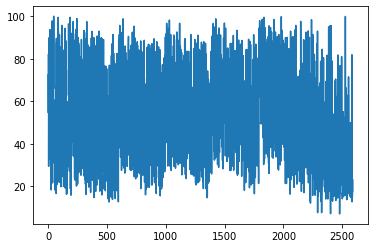

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting columns with null values:
plt.plot(uniRanks_df['Inter_Outlook_Rating'])

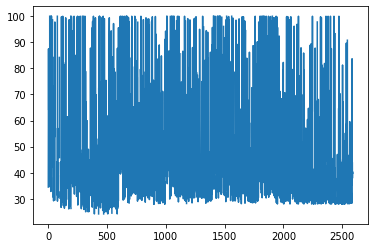

In [6]:
# plotting columns with null values:
plt.plot(uniRanks_df['Industry_Income_Rating'])

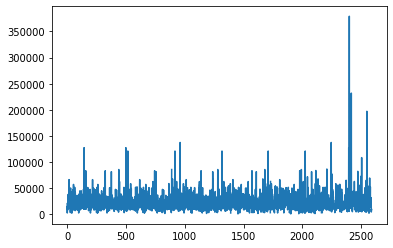

In [7]:
# plotting columns with null values:
plt.plot(uniRanks_df['Num_Students'])

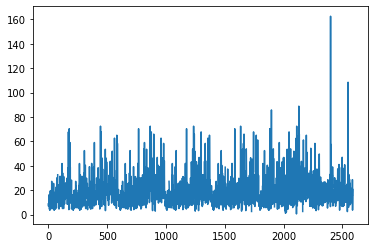

In [8]:
# plotting columns with null values:
plt.plot(uniRanks_df['Student/Staff_Ratio'])

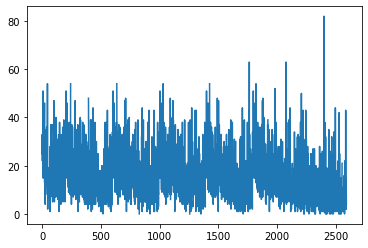

In [9]:
# plotting columns with null values:
plt.plot(uniRanks_df['%_Inter_Students'])

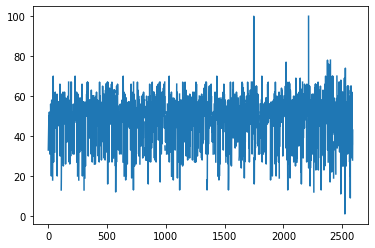

In [10]:
# plotting columns with null values:
plt.plot(uniRanks_df['%_Female_Students'])

In [11]:
# Since the data is not skewed, it is feasible to impute NaN values with arithmetic means of respective columns

# print('Inter_Outlook_Rating Mean:', uniRanks_df['Inter_Outlook_Rating'].mean())
# Inter_Outlook_Rating Mean: 52.115459124370425
uniRanks_df['Inter_Outlook_Rating'] = uniRanks_df['Inter_Outlook_Rating'].fillna(float("{0:.1f}".format(uniRanks_df['Inter_Outlook_Rating'].mean())))

# similarly for the rest of the columns:
# print('Industry_Income_Rating Mean:', uniRanks_df['Industry_Income_Rating'].mean())
# Industry_Income_Rating Mean: 48.97987421383644
uniRanks_df['Industry_Income_Rating'] = uniRanks_df['Industry_Income_Rating'].fillna(float("{0:.1f}".format(uniRanks_df['Industry_Income_Rating'].mean())))

#print('Num_Students Mean:', round(uniRanks_df['Num_Students'].mean()))
# Num_Students Mean: 23874
uniRanks_df['Num_Students'] = uniRanks_df['Num_Students'].fillna(float("{0:.1f}".format(round(uniRanks_df['Num_Students'].mean()))))

# print('Student/Staff_Ratio Mean:', uniRanks_df['Student/Staff_Ratio'].mean())
# Student/Staff_Ratio Mean: 18.445283018867975
uniRanks_df['Student/Staff_Ratio'] = uniRanks_df['Student/Staff_Ratio'].fillna(float("{0:.1f}".format(uniRanks_df['Student/Staff_Ratio'].mean())))

# print('%_Inter_Students Mean:', round(uniRanks_df['%_Inter_Students'].mean()))
# %_Inter_Students Mean: 15
uniRanks_df['%_Inter_Students'] = uniRanks_df['%_Inter_Students'].fillna(float("{0:.1f}".format(round(uniRanks_df['%_Inter_Students'].mean()))))

# print('%_Female_Students Mean:', round(uniRanks_df['%_Female_Students'].mean()))
# %_Female_Students Mean: 50
uniRanks_df['%_Female_Students'] = uniRanks_df['%_Female_Students'].fillna(float("{0:.1f}".format(round(uniRanks_df['%_Female_Students'].mean()))))


# Final check for null values:
uniRanks_df.isna().any()

World_Rank                False
University_Name           False
Country                   False
Teaching_Rating           False
Inter_Outlook_Rating      False
Research_Rating           False
Citations_Rating          False
Industry_Income_Rating    False
Num_Students              False
Student/Staff_Ratio       False
%_Inter_Students          False
%_Female_Students         False
Year                      False
dtype: bool

In [12]:
# Saving cleaned data:
uniRanks_df.to_csv("UnivesityRankings_Cleaned.csv")

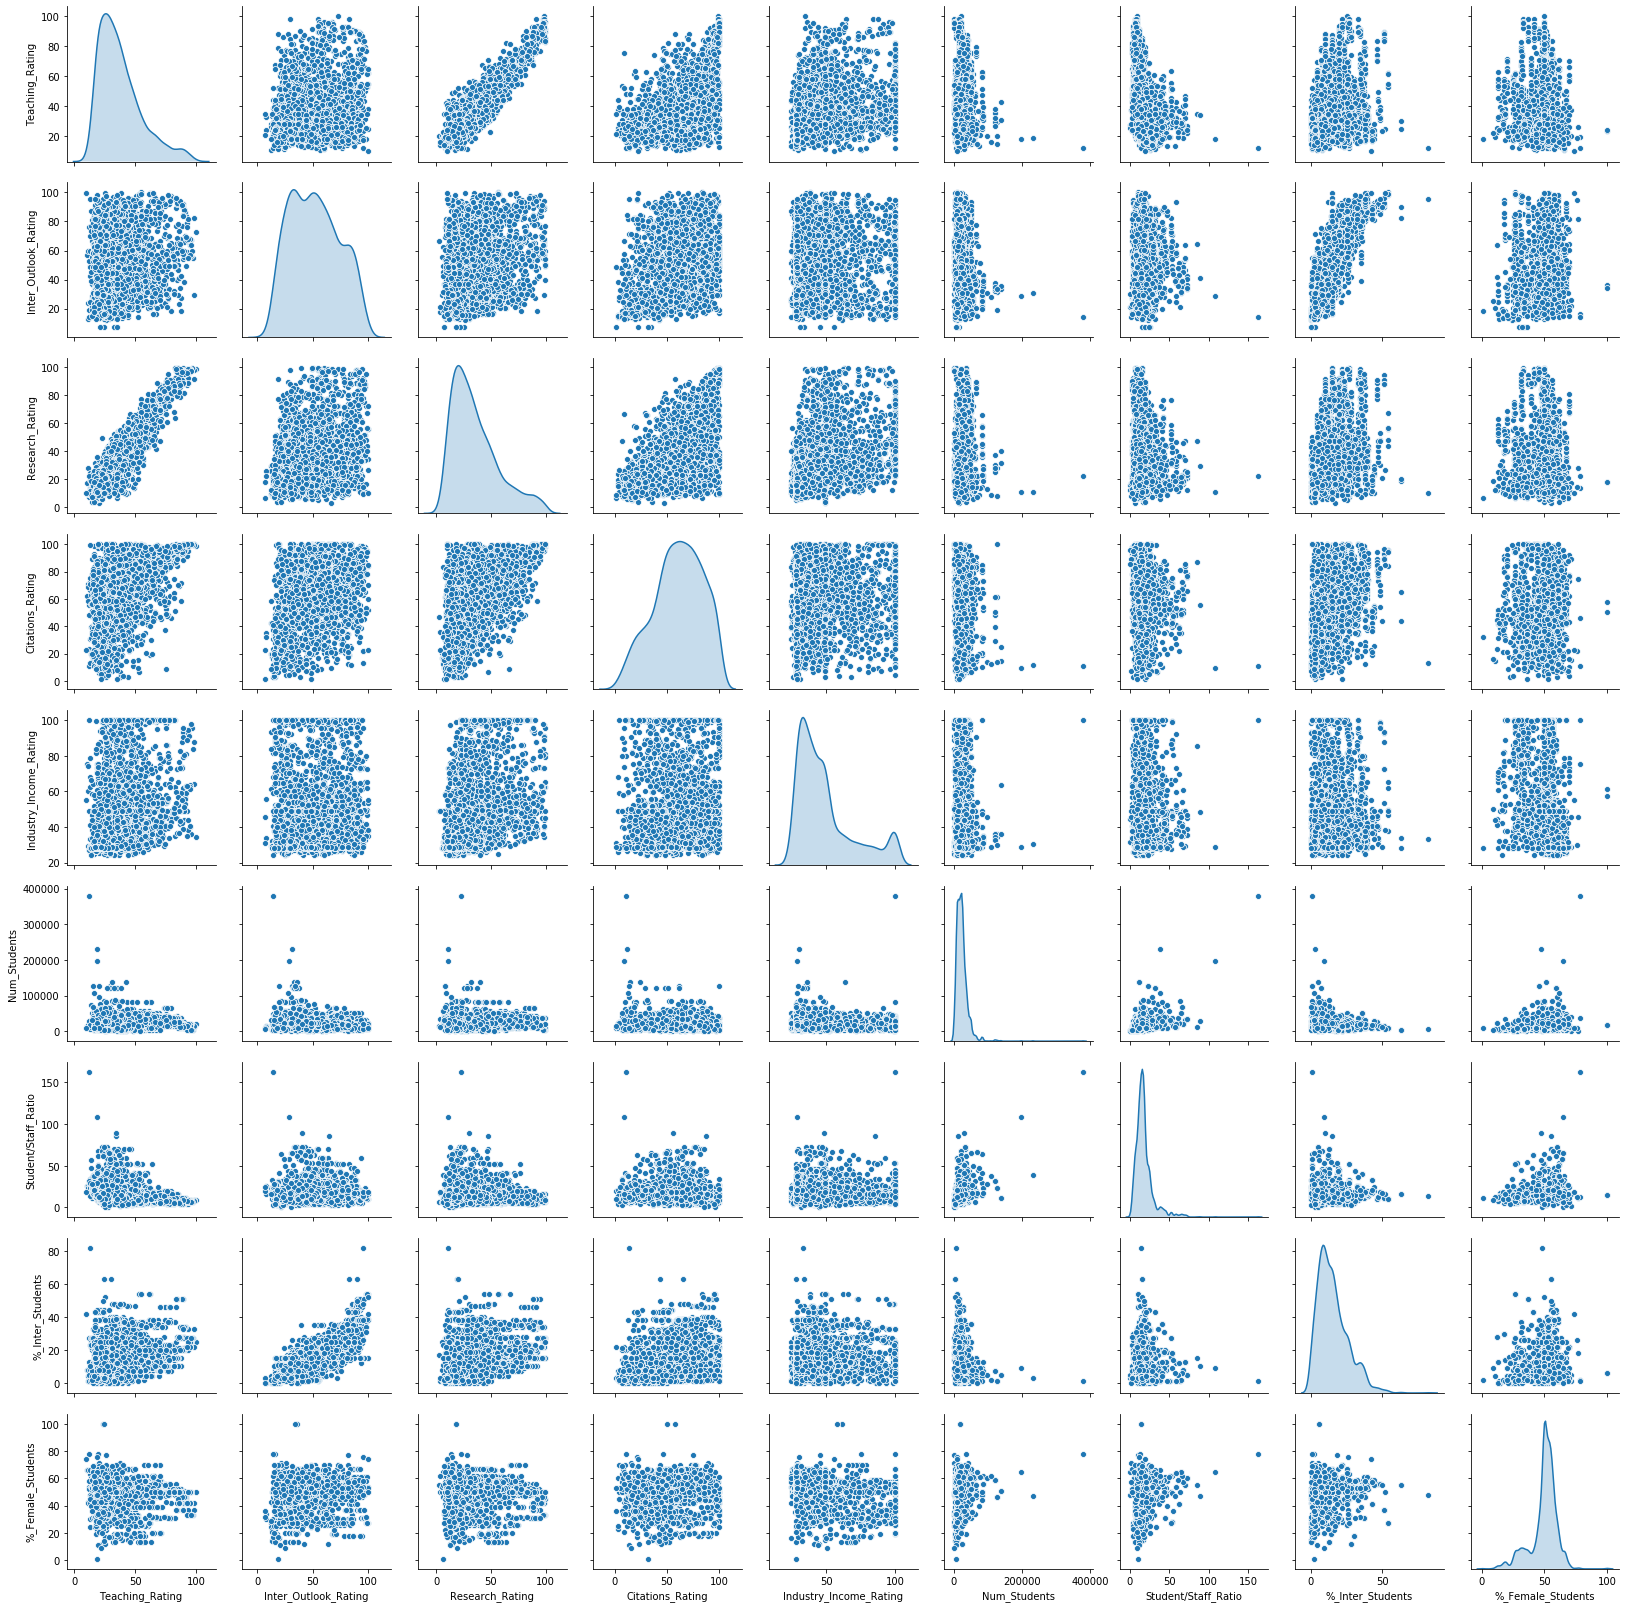

In [13]:
# Plotting scatterplots for predictor variables to detect outliers

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

uniRanks_df = pd.read_csv("UnivesityRankings_Cleaned.csv")
sns.pairplot(uniRanks_df, kind="scatter", diag_kind="kde", vars=["Teaching_Rating","Inter_Outlook_Rating","Research_Rating","Citations_Rating","Industry_Income_Rating","Num_Students","Student/Staff_Ratio","%_Inter_Students","%_Female_Students"])
plt.show()

[Text(0.5, 0, 'Unnamed: 0'),
 Text(1.5, 0, 'World_Rank'),
 Text(2.5, 0, 'Teaching_Rating'),
 Text(3.5, 0, 'Inter_Outlook_Rating'),
 Text(4.5, 0, 'Research_Rating'),
 Text(5.5, 0, 'Citations_Rating'),
 Text(6.5, 0, 'Industry_Income_Rating'),
 Text(7.5, 0, 'Num_Students'),
 Text(8.5, 0, 'Student/Staff_Ratio'),
 Text(9.5, 0, '%_Inter_Students'),
 Text(10.5, 0, '%_Female_Students'),
 Text(11.5, 0, 'Year')]

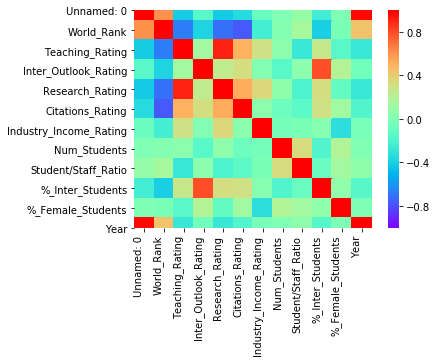

In [14]:
# Plotting a correlation matrix to identify which variables affect our prediction the most

%matplotlib inline
import seaborn as sns
corr = uniRanks_df.corr()

ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='rainbow', square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

There is no strong positive or strong negative correlation (>0.80 or <-0.80)

## Sampling:

In [15]:
# Selecting a random sample to train all models upon:
uniRanks_df = uniRanks_df.sample(frac = 0.30)
X = uniRanks_df[['Teaching_Rating', 'Inter_Outlook_Rating', 'Research_Rating', 'Citations_Rating', 'Industry_Income_Rating', 'Num_Students', 'Student/Staff_Ratio', '%_Inter_Students', '%_Female_Students']].as_matrix()
y = uniRanks_df['World_Rank']

C:\Users\heta2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Train-Test Split and Scaling:

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

X_train

array([[0.44366197, 0.42888644, 0.41505376, ..., 0.48100093, 0.25396825,
        0.5942029 ],
       [0.44014085, 0.29437707, 0.47741935, ..., 0.04819277, 0.15873016,
        0.60869565],
       [0.29107981, 0.18412348, 0.34408602, ..., 0.11306766, 0.0952381 ,
        0.4057971 ],
       ...,
       [0.14553991, 0.71003308, 0.18817204, ..., 0.15940686, 0.33333333,
        0.71014493],
       [0.28286385, 0.37816979, 0.30322581, ..., 0.10194625, 0.22222222,
        0.5942029 ],
       [0.93661972, 0.66593164, 0.99677419, ..., 0.07692308, 0.3968254 ,
        0.5942029 ]])

## Linear Regression (Normal Equation):

In [17]:
from sklearn.linear_model import LinearRegression

# 1: Create the model:
lreg = LinearRegression()

# 2: Train the model:
lreg.fit(X_train, y_train)
# y_pred=lreg.predict(X_test)

# 3: Evaluate the model:
print('Train score: ', lreg.score(X_train, y_train))
print('Test score: ', lreg.score(X_test, y_test))

Train score:  0.7558955088436368
Test score:  0.7699575047659011


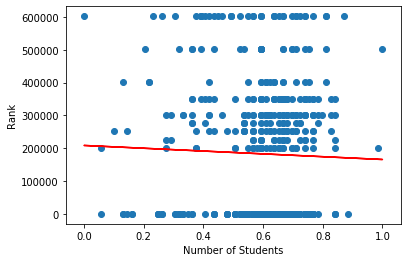

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,8].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm, y_train)
plt.xlabel('Number of Students')
plt.ylabel('Rank')
plt.show()

In [19]:
# Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lreg, X, y, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [0.79614322 0.7502207  0.77772448 0.7167758  0.68878646]
Average cross-validation score: 0.75


As seen, Linear regression gave a score of ~0.75, so I try other ways to find a better model:

## KNN Regressor:

Text(0, 0.5, 'Accuracy(score) MSE')

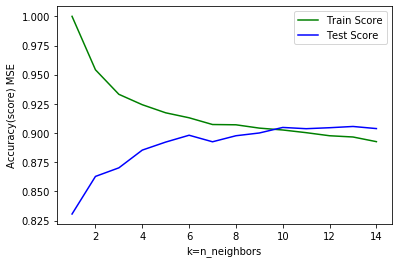

In [32]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

train_score_array = []
test_score_array = []

for k in range(1,15):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))
    
x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k=n_neighbors')
plt.ylabel('Accuracy(score) MSE')

In [21]:
# identifying best train score:
for i in range (1,15):
    knnreg = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    
    w = knnreg.score(X_train, y_train)
    print(i, w)

1 1.0
2 0.9542163985435845
3 0.9332089219301475
4 0.9242957915880212
5 0.9173694410311958
6 0.9131028845280574
7 0.9073362641125796
8 0.9070979557330001
9 0.904256702819662
10 0.9026528879372281
11 0.9003565303378701
12 0.8977169656225548
13 0.8966504888541321
14 0.8926560597445149


In [22]:
# identifying best test score:
for i in range (1,15):
    knnreg = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    
    w = knnreg.score(X_test, y_test)
    print(i, w)

1 0.8306801572531441
2 0.8628824493668834
3 0.8702279092614437
4 0.8854243337812514
5 0.8922983470764974
6 0.8981564711273844
7 0.8925516958265676
8 0.8977162932941662
9 0.9000863525772836
10 0.9048311799090182
11 0.9037569380048576
12 0.9045907482428793
13 0.9056636840387599
14 0.9038540764413097


The best train score is obtained with k = 1 or k = 2. However, this will lead to underfitting. And the best test score is obtained at k = 9 or k = 10. But this will lead to overfitting. So I select k = 4 as a moderate value (as also seen in the KNN Regressor plot)

(work in progress)